# Data Collection Part

In [453]:
import numpy as np  
import pandas as pd
from sklearn.datasets import fetch_20newsgroups  

In [454]:
# Load full 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print("Total Documents Loaded:", len(documents))

Total Documents Loaded: 18846


In [455]:
categories = newsgroups.target_names
labels = newsgroups.target  # Numerical category labels

In [456]:
# Create a DataFrame
df = pd.DataFrame({'Category': [categories[label] for label in labels], 'Text': documents})

In [457]:
# Save to CSV file
df.to_csv('20newsgroups_dataset.csv', index=False, encoding='utf-8')
print("Dataset saved as 20newsgroups_dataset.csv")

Dataset saved as 20newsgroups_dataset.csv


In [458]:
df

,Category,Text
0,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...
1,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...
2,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...
3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...
...,...,...
18841,sci.med,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,sci.electronics,\nNot in isolated ground recepticles (usually ...
18843,comp.sys.ibm.pc.hardware,I just installed a DX2-66 CPU in a clone mothe...
18844,comp.graphics,\nWouldn't this require a hyper-sphere. In 3-...


# Step 2: Data Preparation & Cleaning

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  18846 non-null  object
 1   Text      18846 non-null  object
dtypes: object(2)
memory usage: 294.6+ KB


In [461]:
df.describe()

,Category,Text
count,18846,18846
unique,20,18287
top,rec.sport.hockey,
freq,999,380


In [462]:
df.isna().sum()

Category    0
Text        0
dtype: int64

In [463]:
# Drop rows where 'text' is NaN
df.dropna(subset=['Text'], inplace=True)

In [464]:
# Check for null values again
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [465]:
df

,Category,Text
0,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...
1,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...
2,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...
3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...
...,...,...
18841,sci.med,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,sci.electronics,\nNot in isolated ground recepticles (usually ...
18843,comp.sys.ibm.pc.hardware,I just installed a DX2-66 CPU in a clone mothe...
18844,comp.graphics,\nWouldn't this require a hyper-sphere. In 3-...


In [466]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [467]:
# Define text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)                 # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)            # Remove special characters/digits
    text = text.lower()                               # Convert to lowercase
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatization
    return ' '.join(words)

In [468]:
# Apply the clean_text function to 'text' column
df['clean_text'] = df['Text'].apply(clean_text)

In [469]:
# Show cleaned data
df[['clean_text', 'Category']].head()

,clean_text,Category
0,sure bashers pen fan pretty confused lack kind...,rec.sport.hockey
1,brother market high performance video card sup...,comp.sys.ibm.pc.hardware
2,finally said dream mediterranean new area grea...,talk.politics.mideast
3,think scsi card dma transfer disk scsi card dm...,comp.sys.ibm.pc.hardware
4,old jasmine drive cannot use new system unders...,comp.sys.mac.hardware


In [470]:
# now, the data is clean 
df

,Category,Text,clean_text
0,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...,sure bashers pen fan pretty confused lack kind...
1,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...,brother market high performance video card sup...
2,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...,finally said dream mediterranean new area grea...
3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...,think scsi card dma transfer disk scsi card dm...
4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...,old jasmine drive cannot use new system unders...
...,...,...,...
18841,sci.med,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn nyeda cnsvax uwec edu david nye dn neurolog...
18842,sci.electronics,\nNot in isolated ground recepticles (usually ...,isolated ground recepticles usually unusual co...
18843,comp.sys.ibm.pc.hardware,I just installed a DX2-66 CPU in a clone mothe...,installed dx cpu clone motherboard tried mount...
18844,comp.graphics,\nWouldn't this require a hyper-sphere. In 3-...,require hyper sphere space point specifies sph...


In [471]:
df.drop(columns = 'Text', inplace = True)

In [472]:
df

,Category,clean_text
0,rec.sport.hockey,sure bashers pen fan pretty confused lack kind...
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...
2,talk.politics.mideast,finally said dream mediterranean new area grea...
3,comp.sys.ibm.pc.hardware,think scsi card dma transfer disk scsi card dm...
4,comp.sys.mac.hardware,old jasmine drive cannot use new system unders...
...,...,...
18841,sci.med,dn nyeda cnsvax uwec edu david nye dn neurolog...
18842,sci.electronics,isolated ground recepticles usually unusual co...
18843,comp.sys.ibm.pc.hardware,installed dx cpu clone motherboard tried mount...
18844,comp.graphics,require hyper sphere space point specifies sph...


In [473]:
# df['text_length'].max()

# Step 3: Vectorization & EDA

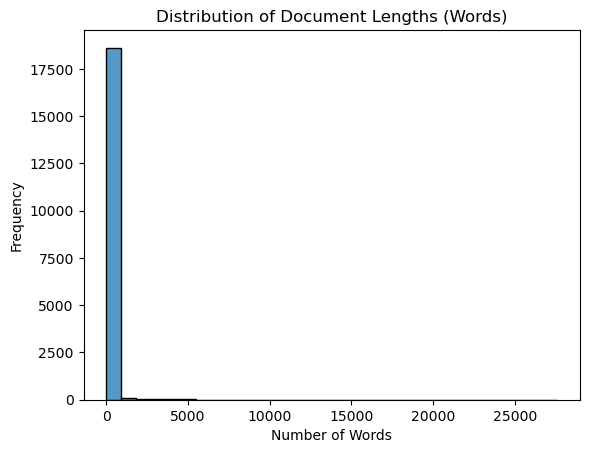

In [475]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

text_column = 'clean_text'

# Document Length Distribution
df['text_length'] = df[text_column].apply(lambda x: len(x.split()))
# plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins = 30, kde = False)
plt.title('Distribution of Document Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

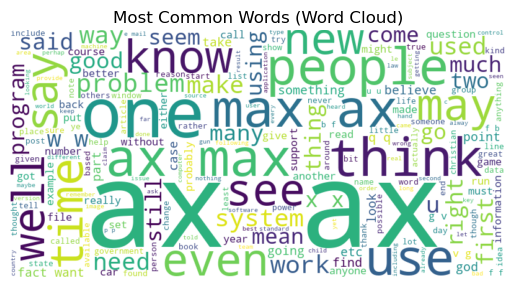

In [476]:
# Word Cloud of All Texts
all_text = " ".join(df[text_column].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
# plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words (Word Cloud)")
plt.show()

In [477]:
# TF-IDF Vectorizer Preview
vectorizer = TfidfVectorizer(max_features = 20)  # limit to top 20 words for visibility
X_tfidf = vectorizer.fit_transform(df[text_column])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [478]:
X_tfidf

<18846x20 sparse matrix of type '<class 'numpy.float64'>'
	with 56674 stored elements in Compressed Sparse Row format>

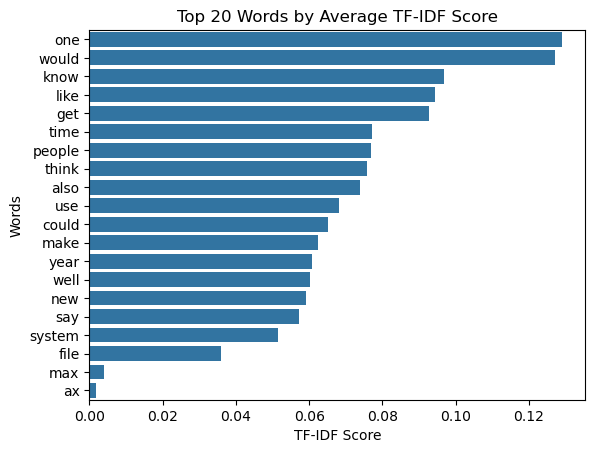

In [479]:
# Plot Top TF-IDF Terms
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)

sns.barplot(x = tfidf_mean.values, y = tfidf_mean.index)
plt.title("Top 20 Words by Average TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()

In [480]:
tfidf_df

,also,ax,could,file,get,know,like,make,max,new,one,people,say,system,think,time,use,well,would,year
0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.253591,0.496712,0.000000,0.0,0.311747,0.223633,0.000000,0.610520,0.000000,0.000000,0.270531,0.000000,0.000000,0.000000,0.309595
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.714253,0.699887,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.288044,0.000000,0.000000,0.0,0.177050,0.254015,0.000000,0.000000,0.756079,0.000000,0.000000,0.499505,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.561932,0.0,0.0,0.0,0.524129,0.000000,0.337981,0.197145,0.0,0.000000,0.000000,0.192354,0.000000,0.000000,0.375715,0.184079,0.000000,0.000000,0.000000,0.210660
18842,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18843,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18844,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 4 Feature Engineering And Selection

In [482]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

text_column = 'clean_text'

# TF-IDF Vectorization
# vectorizer = TfidfVectorizer(
 #    max_df = 0.4,       # ignore very common words
 #    min_df = 2,         # ignore very rare words
 #    max_features = 4000,  # limit vocab size
 #    stop_words='english', 
 #    ngram_range=(1, 2), # unigrams + bigrams
 #    sublinear_tf = True,# compress high TF values
 #    norm = 'l2' # normalize vectors
 # )


# use_idf = True
# Jo word har jagah milta hai, uska importance kam kar do.
# Aur jo word sirf kuch documents mein milta hai, usko high importance do.
# agar min_df = 0.2, to wo words jo zyada documents mein common nahi hain, wo ignore ho jayenge

vectorizer = TfidfVectorizer(max_df = 0.7, max_features = 3000,
                                       min_df = 0.2,
                                       use_idf = True, ngram_range = (1, 2)
                            )
# We used TfidfVectorizer to convert text into numbers. These settings help remove very common and very rare words, 
# and also consider single words and word pairs for better meaning.

In [483]:
X_tfidf = vectorizer.fit_transform(df[text_column])

print("TF-IDF shape:", X_tfidf.shape)  # rows = documents, cols = features

TF-IDF shape: (18846, 5)


In [484]:
# Dimensionality Reduction using TruncatedSVD -- Not need but 
svd = TruncatedSVD(n_components = 2, random_state = 42)
X_reduced = svd.fit_transform(X_tfidf)

print("Reduced feature shape:", X_reduced.shape)

Reduced feature shape: (18846, 2)


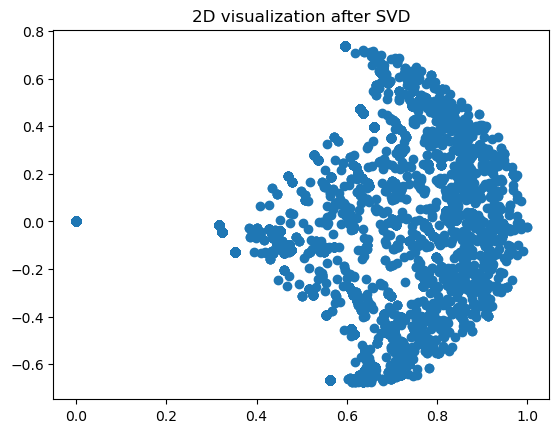

In [485]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("2D visualization after SVD")
plt.show()

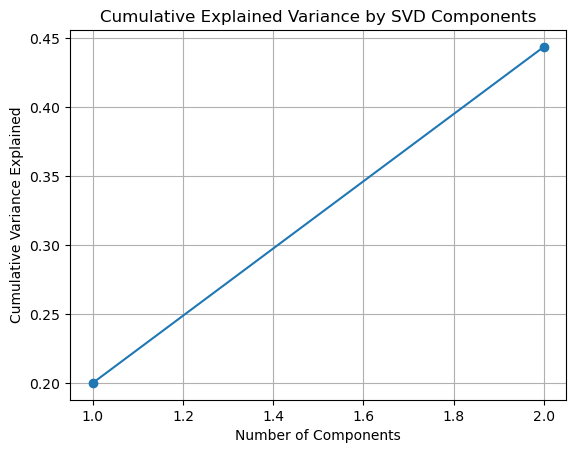

In [486]:
# Variance Explained Plot -- Only for see
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

# The graph shows that we don't need all the data to get good results.
# Using fewer parts (components) still gives us enough useful information for grouping documents.

In [487]:
# Save the feature matrix
import joblib
joblib.dump(X_reduced, 'tfidf_reduced_features.pkl')  # For K-Means input
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')       # To use later if needed

['tfidf_vectorizer.pkl']

# ✅ Step 5: Model Selection & Training

In [489]:
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load TF-IDF Features ---
X = joblib.load('tfidf_reduced_features.pkl')

In [490]:
# Elbow Method to Find Best k
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [491]:
wcss

[2289.0746827241164,
 865.5909366709664,
 482.68434494672164,
 250.45230222410711,
 161.2722043684942,
 118.8480451052518,
 104.07226511058464,
 89.01740248187818,
 72.16967510344945]

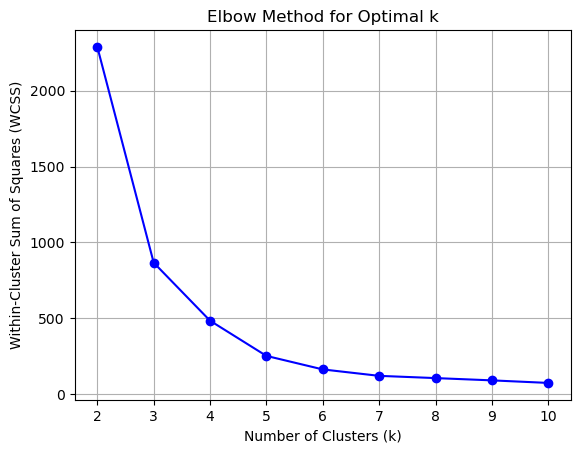

In [492]:
# Plot WCSS vs. k
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [493]:
# Calculating, cluster - best score
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    print(f'k = {k} → Silhouette Score: {sil_score:.4f}')

k = 2 → Silhouette Score: 0.5287
k = 3 → Silhouette Score: 0.6555
k = 4 → Silhouette Score: 0.7071
k = 5 → Silhouette Score: 0.7699
k = 6 → Silhouette Score: 0.7849
k = 7 → Silhouette Score: 0.7689
k = 8 → Silhouette Score: 0.7585
k = 9 → Silhouette Score: 0.7650
k = 10 → Silhouette Score: 0.7767


In [494]:
# Train Final Model with Best k 
best_k = 6
final_kmeans = KMeans(n_clusters = best_k, random_state = 42)
cluster_labels = final_kmeans.fit_predict(X)

In [495]:
# Save Model & Cluster Labels ---
joblib.dump(final_kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [496]:
df

,Category,clean_text,text_length
0,rec.sport.hockey,sure bashers pen fan pretty confused lack kind...,71
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,35
2,talk.politics.mideast,finally said dream mediterranean new area grea...,115
3,comp.sys.ibm.pc.hardware,think scsi card dma transfer disk scsi card dm...,71
4,comp.sys.mac.hardware,old jasmine drive cannot use new system unders...,56
...,...,...,...
18841,sci.med,dn nyeda cnsvax uwec edu david nye dn neurolog...,165
18842,sci.electronics,isolated ground recepticles usually unusual co...,18
18843,comp.sys.ibm.pc.hardware,installed dx cpu clone motherboard tried mount...,50
18844,comp.graphics,require hyper sphere space point specifies sph...,25


In [497]:
df['cluster'] = cluster_labels
print(df[['clean_text', 'cluster']].head())

                                          clean_text  cluster
0  sure bashers pen fan pretty confused lack kind...        2
1  brother market high performance video card sup...        2
2  finally said dream mediterranean new area grea...        4
3  think scsi card dma transfer disk scsi card dm...        2
4  old jasmine drive cannot use new system unders...        4


# ✅ Step 6: Model Evaluation & Optimization

In [499]:
# Performance of cluster
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['cluster'])
print("Silhouette Score for k =", best_k, "is", round(score, 4))

Silhouette Score for k = 6 is 0.7849


In [500]:
df

,Category,clean_text,text_length,cluster
0,rec.sport.hockey,sure bashers pen fan pretty confused lack kind...,71,2
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,35,2
2,talk.politics.mideast,finally said dream mediterranean new area grea...,115,4
3,comp.sys.ibm.pc.hardware,think scsi card dma transfer disk scsi card dm...,71,2
4,comp.sys.mac.hardware,old jasmine drive cannot use new system unders...,56,4
...,...,...,...,...
18841,sci.med,dn nyeda cnsvax uwec edu david nye dn neurolog...,165,0
18842,sci.electronics,isolated ground recepticles usually unusual co...,18,2
18843,comp.sys.ibm.pc.hardware,installed dx cpu clone motherboard tried mount...,50,2
18844,comp.graphics,require hyper sphere space point specifies sph...,25,2


In [501]:
# Sample 10 documents from each cluster
for i in range(best_k):
    print(f"\nCluster {i}:\n")
    sample_texts = df[df['cluster'] == i]['clean_text'].sample(3, random_state=42)
    for text in sample_texts:
        print("-", text[:100], "...\n")


Cluster 0:

- servicing machine hp whenever thing start get beep powerup anyone know error message signifies seem  ...

- hmm seems core christianity feel guilty single personality save universal guilt feeling brian tell s ...

- filmed day first assault bd clearly allowed batf agent shot wounded leave compound lesson suppose ke ...


Cluster 1:

- build still number problem sheared font instance crystal font enabled problem color darkening others ...

- request opinion better one piece aerostitch two piece aerostitch looking well pc versatile pc better ...

- call presentation navy scientific visualization virtual reality seminar tuesday june carderock divis ...


Cluster 2:

- dlc umcc umcc umich edu david ...

- problem zombo traded st louis last year goalie vincent riendeau think chevy among elite class goalie ...

- b votre host est mal configure bonjour sylvain j ai travaille avec le hc il an et je ne souviens pa  ...


Cluster 3:

- sure nail cruel imagine nail eye would painfu

In [502]:
# new_doc = ["This article discusses the latest trends in artificial intelligence and machine learning used in software development."]
new_doc = ["The government has announced a new policy to improve rural infrastructure."]

# Step 1: Transform with same vectorizer
new_tfidf = vectorizer.transform(new_doc)

# Step 2: Apply SVD (if used)
new_svd = svd.transform(new_tfidf)

# Step 3: Predict using trained KMeans model
predicted_cluster = kmeans.predict(new_svd)

print(f"The document belongs to Cluster {predicted_cluster[0]}")

The document belongs to Cluster 2


In [503]:
test_docs = [
    "This paper explores quantum computing and its future applications in cryptography.",
    "The government has announced a new policy to improve rural infrastructure.",
    "The football team secured a thrilling win in the last minute of the match.",
    "The movie received critical acclaim for its direction and strong performances."
]

for doc in test_docs:
    tfidf = vectorizer.transform([doc])
    svd_transformed = svd.transform(tfidf)
    cluster = kmeans.predict(svd_transformed)
    print(f"Doc: {doc[:60]}... → Cluster {cluster[0]}")

Doc: This paper explores quantum computing and its future applica... → Cluster 2
Doc: The government has announced a new policy to improve rural i... → Cluster 2
Doc: The football team secured a thrilling win in the last minute... → Cluster 2
Doc: The movie received critical acclaim for its direction and st... → Cluster 2
